In [1]:
# imports

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score # might never use this one, if so, remove
from sklearn import preprocessing

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# others
# import graphviz
# from graphviz import Graph

# Custom module imports
import acquire as a
import prepare as p
import explore as e

I tried it on whole df and it messed with encoded categorical variables or broke when there were values other than numbers

In [2]:
# read raw data info a dataframe (df)
df = a.get_telco_data()

In [3]:
# let's use the prepare.py module to implement findings above and clean data
df = p.clean_telco(df)

In [4]:
train, validate, test = p.split_telco(df)

In [5]:
# create a list of all numeric columns to use below in function
quant_vars = df.select_dtypes(include = ['number']).columns.tolist()
quant_vars

['tenure', 'monthly_charges', 'total_charges']

In [6]:
# create subsets of each for scaling
train_num = train[quant_vars]
validate_num = validate[quant_vars]
test_num = test[quant_vars]

In [7]:
# lets try to scale and transform train using robust scaler
scaler = preprocessing.RobustScaler()
scaler.fit(train_num)
train_num_scaled = scaler.transform(train_num)
validate_num_scaled = scaler.transform(validate_num)
test_num_scaled = scaler.transform(test_num)

In [8]:
train_num_scaled

array([[ 0.93478261,  0.63821892,  1.79584623],
       [-0.02173913, -0.39332096, -0.00346148],
       [-0.52173913, -0.85621521, -0.38770002],
       ...,
       [-0.58695652,  0.4619666 , -0.36587512],
       [ 0.08695652, -0.216141  ,  0.13570161],
       [ 0.67391304,  0.54545455,  1.35142786]])

In [9]:
validate_num_scaled

array([[-0.26086957, -0.93413729, -0.29446017],
       [ 0.43478261, -0.56493506,  0.1902932 ],
       [-0.45652174,  0.26159555, -0.23310697],
       ...,
       [ 0.93478261,  0.49628942,  1.58971237],
       [ 0.7173913 ,  0.27829314,  1.11271799],
       [-0.06521739, -0.96289425, -0.28233034]])

In [10]:
test_num_scaled

array([[-0.34782609, -0.96103896, -0.34098476],
       [ 0.76086957,  0.60111317,  1.50386483],
       [ 0.54347826, -0.01762523,  0.67281714],
       ...,
       [ 0.63043478,  0.43135436,  1.21491955],
       [-0.34782609,  0.01576994, -0.14614471],
       [-0.17391304,  0.05473098,  0.04213908]])

In [11]:
# train_num_scaled = pd.DataFrame(data=train_num_scaled, columns=quant_vars)

In [12]:
train_num_scaled = pd.DataFrame(data=train_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])

In [13]:
train_num_scaled.head()

,tenure_scaled,monthly_charges_scaled,total_charges_scaled
0,0.934783,0.638219,1.795846
1,-0.021739,-0.393321,-0.003461
2,-0.521739,-0.856215,-0.387700
3,0.217391,0.546382,0.725531
4,0.347826,0.423006,0.814972


In [14]:
# rename columns
# train_num_scaled.rename(columns={'tenure' : 'tenure_scaled', 'monthly_charges' : 'monthly_charges_scaled', 'total_charges' : 'total_charges_scaled'})

In [15]:
train_num.reset_index(inplace=True)

In [16]:
train_num.head()

,index,tenure,monthly_charges,total_charges
0,6169,72,105.50,7544.00
1,3290,28,49.90,1410.25
2,3615,5,24.95,100.40
3,6309,39,100.55,3895.35
4,856,45,93.90,4200.25


In [17]:
# concat them together
train_num_scaled_all = pd.concat([train_num, train_num_scaled], axis=1)

In [18]:
train_num_scaled_all

,index,tenure,monthly_charges,total_charges,tenure_scaled,monthly_charges_scaled,total_charges_scaled
0,6169,72,105.50,7544.00,0.934783,0.638219,1.795846
1,3290,28,49.90,1410.25,-0.021739,-0.393321,-0.003461
2,3615,5,24.95,100.40,-0.521739,-0.856215,-0.387700
3,6309,39,100.55,3895.35,0.217391,0.546382,0.725531
4,856,45,93.90,4200.25,0.347826,0.423006,0.814972
...,...,...,...,...,...,...,...
4220,3797,3,54.70,169.45,-0.565217,-0.304267,-0.367445
4221,328,15,19.60,299.40,-0.304348,-0.955473,-0.329324
4222,1199,2,96.00,174.80,-0.586957,0.461967,-0.365875
4223,2885,33,59.45,1884.65,0.086957,-0.216141,0.135702


In [19]:
# reset index
train.reset_index(inplace=True)

In [20]:
# concat them together
train_scaled = pd.concat([train, train_num_scaled], axis=1)

In [21]:
train_scaled.head().T

,0,1,2,3,4
index,6169,3290,3615,6309,856
gender,Female,Female,Male,Male,Male
senior_citizen,No,No,No,No,Yes
partner,Yes,Yes,Yes,No,No
dependents,No,Yes,No,Yes,No
tenure,72,28,5,39,45
phone_service,Yes,Yes,No,Yes,Yes
multiple_lines,Yes,Yes,No,Yes,Yes
online_security,Yes,No,No,No,No
online_backup,No,No,No,No,No


In [22]:
# drop scaled columns
train_scaled = train_scaled.drop(columns=quant_vars)

In [23]:
train_scaled.head().T

,0,1,2,3,4
index,6169,3290,3615,6309,856
gender,Female,Female,Male,Male,Male
senior_citizen,No,No,No,No,Yes
partner,Yes,Yes,Yes,No,No
dependents,No,Yes,No,Yes,No
phone_service,Yes,Yes,No,Yes,Yes
multiple_lines,Yes,Yes,No,Yes,Yes
online_security,Yes,No,No,No,No
online_backup,No,No,No,No,No
device_protection,Yes,No,No,No,No


In [24]:
# get original index back
train_scaled.set_index('index', inplace=True)

In [25]:
train_num_scaled_all.isnull().sum()

index                     0
tenure                    0
monthly_charges           0
total_charges             0
tenure_scaled             0
monthly_charges_scaled    0
total_charges_scaled      0
dtype: int64

In [26]:
train_scaled.isnull().sum()

gender                    0
senior_citizen            0
partner                   0
dependents                0
phone_service             0
multiple_lines            0
online_security           0
online_backup             0
device_protection         0
tech_support              0
streaming_tv              0
streaming_movies          0
paperless_billing         0
churn                     0
internet_service_type     0
contract_type             0
payment_type              0
tenure_scaled             0
monthly_charges_scaled    0
total_charges_scaled      0
dtype: int64

#### function

In [27]:
# create a function that takes in t, v, and t and creates scaler, fits scaler on train, and scales t, v, and t for only numeric columns
def scale_telco(train, validate, test):
    quant_vars = train.select_dtypes(include = ['number']).columns.tolist()
    train_num = train[quant_vars]
    validate_num = validate[quant_vars]
    test_num = test[quant_vars]
    scaler = preprocessing.RobustScaler()
    scaler.fit(train_num)
    train_num_scaled = scaler.transform(train_num)
    validate_num_scaled = scaler.transform(validate_num)
    test_num_scaled = scaler.transform(test_num)
    train_num_scaled = pd.DataFrame(data=train_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    validate_num_scaled = pd.DataFrame(data=validate_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    test_num_scaled = pd.DataFrame(data=test_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    train.reset_index(inplace=True)
    validate.reset_index(inplace=True)
    test.reset_index(inplace=True)
    train_scaled = pd.concat([train, train_num_scaled], axis=1)
    validate_scaled = pd.concat([validate, validate_num_scaled], axis=1)
    test_scaled = pd.concat([test, test_num_scaled], axis=1)
    train_scaled.set_index('index', inplace=True)
    validate_scaled.set_index('index', inplace=True)
    test_scaled.set_index('index', inplace=True)
    train_scaled.drop(columns=quant_vars, inplace=True)
    validate_scaled.drop(columns=quant_vars, inplace=True)
    test_scaled.drop(columns=quant_vars, inplace=True)
    return train_scaled, validate_scaled, test_scaled
    

In [28]:
# test function

In [29]:
# read raw data info a dataframe (df)
df = a.get_telco_data()

In [30]:
# let's use the prepare.py module to implement findings above and clean data
df = p.clean_telco(df)

In [31]:
train, validate, test = p.split_telco(df)

In [32]:
train, validate, test = scale_telco(train, validate, test)

In [33]:
train.head().T

index,6169,3290,3615,6309,856
gender,Female,Female,Male,Male,Male
senior_citizen,No,No,No,No,Yes
partner,Yes,Yes,Yes,No,No
dependents,No,Yes,No,Yes,No
phone_service,Yes,Yes,No,Yes,Yes
multiple_lines,Yes,Yes,No,Yes,Yes
online_security,Yes,No,No,No,No
online_backup,No,No,No,No,No
device_protection,Yes,No,No,No,No
tech_support,No,No,No,Yes,No


Combine with other fucntion to do everything at once

In [34]:
def dummy_split_scale_telco(df):
    '''
    This function takes in a df, creates dummies for all categorical columns,
    concats dummies onto original df, drops original columns that have been dummied,
    and splits the new df into 60/20/20 train/validate/test
    It then scales only numerical columns using RobustScaler
    '''
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    dummy_df = pd.get_dummies(df[cat_cols], drop_first = True)
    df_w_dummies = pd.concat([df, dummy_df], axis=1)
    df_w_dummies.drop(columns=cat_cols, inplace=True)
    train, test = train_test_split(df_w_dummies, test_size=.2, random_state=123, stratify=df_w_dummies.churn_Yes)
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.churn_Yes)
    quant_vars = df.select_dtypes(include = ['number']).columns.tolist()
    train_num = train[quant_vars]
    validate_num = validate[quant_vars]
    test_num = test[quant_vars]
    scaler = preprocessing.RobustScaler()
    scaler.fit(train_num)
    train_num_scaled = scaler.transform(train_num)
    validate_num_scaled = scaler.transform(validate_num)
    test_num_scaled = scaler.transform(test_num)
    train_num_scaled = pd.DataFrame(data=train_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    validate_num_scaled = pd.DataFrame(data=validate_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    test_num_scaled = pd.DataFrame(data=test_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    train.reset_index(inplace=True)
    validate.reset_index(inplace=True)
    test.reset_index(inplace=True)
    train_scaled = pd.concat([train, train_num_scaled], axis=1)
    validate_scaled = pd.concat([validate, validate_num_scaled], axis=1)
    test_scaled = pd.concat([test, test_num_scaled], axis=1)
    train_scaled.set_index('index', inplace=True)
    validate_scaled.set_index('index', inplace=True)
    test_scaled.set_index('index', inplace=True)
    train_scaled.drop(columns=quant_vars, inplace=True)
    validate_scaled.drop(columns=quant_vars, inplace=True)
    test_scaled.drop(columns=quant_vars, inplace=True)
    return train_scaled, validate_scaled, test_scaled

In [35]:
# test function

In [36]:
# read raw data info a dataframe (df)
df = a.get_telco_data()

In [37]:
# let's use the prepare.py module to implement findings above and clean data
df = p.clean_telco(df)

In [38]:
train, validate, test = dummy_split_scale_telco(df)

In [39]:
train.head()

,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,...,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_scaled,monthly_charges_scaled,total_charges_scaled
index,,,,,,,,,,,,,,,,,,,,,
6169,0,0,1,0,1,1,1,0,1,0,...,1,0,0,1,0,1,0,0.934783,0.638219,1.795846
3290,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,-0.021739,-0.393321,-0.003461
3615,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-0.521739,-0.856215,-0.387700
6309,1,0,0,1,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0.217391,0.546382,0.725531
856,1,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0.347826,0.423006,0.814972


In [40]:
# lets make sure it works when we use it from the imported module

In [41]:
# test function

In [42]:
# read raw data info a dataframe (df)
df = a.get_telco_data()

In [43]:
# let's use the prepare.py module to implement findings above and clean data
df = p.clean_telco(df)

#  RobustScaler

In [44]:
def dummy_split_scale_telco(df):
    '''
    This function takes in a df, creates dummies for all categorical columns,
    concats dummies onto original df, drops original columns that have been dummied,
    and splits the new df into 60/20/20 train/validate/test
    It then scales only numerical columns using RobustScaler
    '''
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    dummy_df = pd.get_dummies(df[cat_cols], drop_first = True)
    df_w_dummies = pd.concat([df, dummy_df], axis=1)
    df_w_dummies.drop(columns=cat_cols, inplace=True)
    train, test = train_test_split(df_w_dummies, test_size=.2, random_state=123, stratify=df_w_dummies.churn_Yes)
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.churn_Yes)
    quant_vars = df.select_dtypes(include = ['number']).columns.tolist()
    train_num = train[quant_vars]
    validate_num = validate[quant_vars]
    test_num = test[quant_vars]
    scaler = preprocessing.RobustScaler()
    scaler.fit(train_num)
    train_num_scaled = scaler.transform(train_num)
    validate_num_scaled = scaler.transform(validate_num)
    test_num_scaled = scaler.transform(test_num)
    train_num_scaled = pd.DataFrame(data=train_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    validate_num_scaled = pd.DataFrame(data=validate_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    test_num_scaled = pd.DataFrame(data=test_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    train.reset_index(inplace=True)
    validate.reset_index(inplace=True)
    test.reset_index(inplace=True)
    train_scaled = pd.concat([train, train_num_scaled], axis=1)
    validate_scaled = pd.concat([validate, validate_num_scaled], axis=1)
    test_scaled = pd.concat([test, test_num_scaled], axis=1)
    train_scaled.set_index('index', inplace=True)
    validate_scaled.set_index('index', inplace=True)
    test_scaled.set_index('index', inplace=True)
    train_scaled.drop(columns=quant_vars, inplace=True)
    validate_scaled.drop(columns=quant_vars, inplace=True)
    test_scaled.drop(columns=quant_vars, inplace=True)
    return train_scaled, validate_scaled, test_scaled

In [45]:
train, validate, test = p.dummy_split_scale_telco(df)

In [46]:
train.head()

,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,...,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_scaled,monthly_charges_scaled,total_charges_scaled
index,,,,,,,,,,,,,,,,,,,,,
6169,0,0,1,0,1,1,1,0,1,0,...,1,0,0,1,0,1,0,0.934783,0.638219,1.795846
3290,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,-0.021739,-0.393321,-0.003461
3615,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-0.521739,-0.856215,-0.387700
6309,1,0,0,1,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0.217391,0.546382,0.725531
856,1,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0.347826,0.423006,0.814972


In [47]:
validate.isnull().sum()

gender_Male                             0
senior_citizen_Yes                      0
partner_Yes                             0
dependents_Yes                          0
phone_service_Yes                       0
multiple_lines_Yes                      0
online_security_Yes                     0
online_backup_Yes                       0
device_protection_Yes                   0
tech_support_Yes                        0
streaming_tv_Yes                        0
streaming_movies_Yes                    0
paperless_billing_Yes                   0
churn_Yes                               0
internet_service_type_Fiber optic       0
internet_service_type_None              0
contract_type_One year                  0
contract_type_Two year                  0
payment_type_Credit card (automatic)    0
payment_type_Electronic check           0
payment_type_Mailed check               0
tenure_scaled                           0
monthly_charges_scaled                  0
total_charges_scaled              

In [48]:
# let's try modeling using new scaled data

#### X and y

In [49]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_train = train.churn_Yes

X_validate = validate.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_test = test.churn_Yes

In [50]:
# check proportions of splits
print(f'Proportion of train: {X_train.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of validate: {X_validate.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of test: {X_test.shape[0]/df.shape[0]:.2f}')

Proportion of train: 0.60
Proportion of validate: 0.20
Proportion of test: 0.20


### Decision Tree

**Compare max depths using for loop**

,train_accuracy,validate_accuracy,difference
max_depth,,,
1,0.734675,0.734564,0.000
2,0.793373,0.783534,0.010
3,0.793373,0.783534,0.010
4,0.800947,0.777857,0.023
5,0.804497,0.785664,0.019
6,0.816331,0.786373,0.030
7,0.829586,0.793471,0.036
8,0.846391,0.787083,0.059
9,0.865089,0.773598,0.091


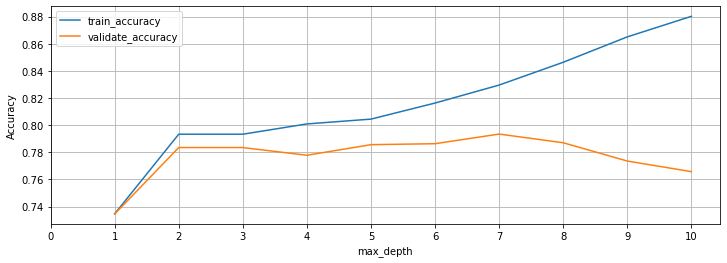

In [51]:
# Let's compare in-sample to out-of-sample for different max depths using a for loop
metrics = []

for i in range(1, 11):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)

# plot the data
df.set_index('max_depth', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,11,1))
plt.grid(b=True)

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best max depth value without crossing threshold for overfit is `7`
    - Accuracy for this model when evaluated on train is: `0.830`
    - Accuracy for this model when evaluated on validate is: `0.794`

---

### Random Forest

**Compare max depths using for loop**
- After experimenting with max depth, min samples per leaf, n estimators, it was discovered that highest accuracy with least amount of overfitting was achieved when only modifying max depth

,train_accuracy,validate_accuracy,difference
max_depth,,,
1,0.734675,0.734564,0.000
2,0.757160,0.751597,0.006
3,0.783905,0.787793,-0.004
4,0.800710,0.792051,0.009
5,0.808757,0.790632,0.018
6,0.817988,0.789212,0.029
7,0.834083,0.794180,0.040
8,0.845207,0.790632,0.055
9,0.860118,0.792051,0.068


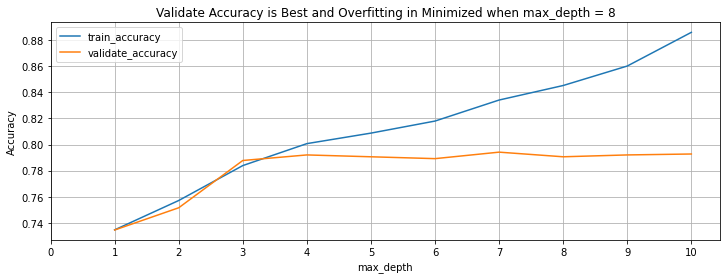

In [52]:
metrics = []

for i in range(1, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)

# plot the data
df.set_index('max_depth', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,11,1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized when max_depth = 8')

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best max depth value without crossing threshold for overfit is `8` -> `4`
    - Accuracy for this model when evaluated on train is: `0.843`
    - Accuracy for this model when evaluated on validate is: `0.794`

---

### KNN

**Compare k values using for loop**

,train_accuracy,validate_accuracy,difference
k,,,
1,0.998580,0.722498,0.276
2,0.875266,0.765791,0.109
3,0.867219,0.753016,0.114
4,0.848284,0.767921,0.080
5,0.842130,0.757275,0.085
6,0.832189,0.771469,0.061
7,0.831243,0.773598,0.058
8,0.829112,0.785664,0.043
9,0.827929,0.782825,0.045


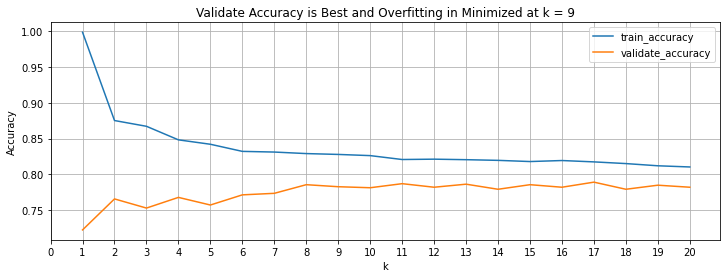

In [53]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remember only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
df = pd.DataFrame(metrics)

# plot the data
df.set_index('k', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized at k = 9')

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best k value without crossing threshold for overfit is `9` -> `17`
    - Accuracy for this model when evaluated on train is: `0.815`
    - Accuracy for this model when evaluated on validate is: `0.801`

---

### Logistic Regression

**Compare C values using for loop**

,train_accuracy,validate_accuracy,difference
C,,,
0.1,0.801183,0.794180,0.007
0.2,0.802130,0.793471,0.009
0.3,0.802840,0.794180,0.009
0.4,0.804024,0.798439,0.006
0.5,0.804024,0.799148,0.005
0.6,0.804497,0.799148,0.005
0.7,0.804970,0.799148,0.006
0.8,0.805444,0.798439,0.007
0.9,0.805207,0.798439,0.007


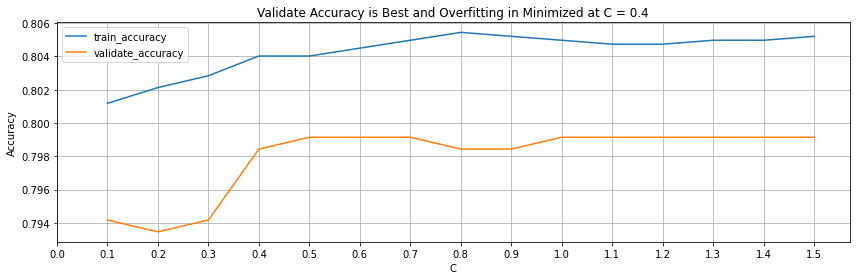

In [54]:
metrics = []

# loop through different values of C
for c in np.arange(0.1, 1.6, 0.1):
            
    # define the thing
    logit = LogisticRegression(C=c, random_state=123)
    
    # fit the thing (remember only fit on training data)
    logit.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = logit.score(X_train, y_train)
    validate_accuracy = logit.score(X_validate, y_validate)
    
    output = {
        "C": c,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
df = pd.DataFrame(metrics)

# plot the data
df.set_index('C', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 1.6, 0.1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized at C = 0.4')
plt.tight_layout()

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best C value without crossing threshold for overfit is `0.4` -> `0.5`
    - Accuracy for this model when evaluated on train is: `0.802`
    - Accuracy for this model when evaluated on validate is: `0.798`

***This one may be better than others when tested on test***

---

#  StandardScaler

In [55]:
def dummy_split_scale_telco(df):
    '''
    This function takes in a df, creates dummies for all categorical columns,
    concats dummies onto original df, drops original columns that have been dummied,
    and splits the new df into 60/20/20 train/validate/test
    It then scales only numerical columns using RobustScaler
    '''
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    dummy_df = pd.get_dummies(df[cat_cols], drop_first = True)
    df_w_dummies = pd.concat([df, dummy_df], axis=1)
    df_w_dummies.drop(columns=cat_cols, inplace=True)
    train, test = train_test_split(df_w_dummies, test_size=.2, random_state=123, stratify=df_w_dummies.churn_Yes)
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.churn_Yes)
    quant_vars = df.select_dtypes(include = ['number']).columns.tolist()
    train_num = train[quant_vars]
    validate_num = validate[quant_vars]
    test_num = test[quant_vars]
    scaler = preprocessing.StandardScaler()
    scaler.fit(train_num)
    train_num_scaled = scaler.transform(train_num)
    validate_num_scaled = scaler.transform(validate_num)
    test_num_scaled = scaler.transform(test_num)
    train_num_scaled = pd.DataFrame(data=train_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    validate_num_scaled = pd.DataFrame(data=validate_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    test_num_scaled = pd.DataFrame(data=test_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    train.reset_index(inplace=True)
    validate.reset_index(inplace=True)
    test.reset_index(inplace=True)
    train_scaled = pd.concat([train, train_num_scaled], axis=1)
    validate_scaled = pd.concat([validate, validate_num_scaled], axis=1)
    test_scaled = pd.concat([test, test_num_scaled], axis=1)
    train_scaled.set_index('index', inplace=True)
    validate_scaled.set_index('index', inplace=True)
    test_scaled.set_index('index', inplace=True)
    train_scaled.drop(columns=quant_vars, inplace=True)
    validate_scaled.drop(columns=quant_vars, inplace=True)
    test_scaled.drop(columns=quant_vars, inplace=True)
    return train_scaled, validate_scaled, test_scaled

In [56]:
# read raw data info a dataframe (df)
df = a.get_telco_data()

In [57]:
# let's use the prepare.py module to implement findings above and clean data
df = p.clean_telco(df)

In [58]:
train, validate, test = dummy_split_scale_telco(df)

In [59]:
train.head()

,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,...,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_scaled,monthly_charges_scaled,total_charges_scaled
index,,,,,,,,,,,,,,,,,,,,,
6169,0,0,1,0,1,1,1,0,1,0,...,1,0,0,1,0,1,0,1.621125,1.339161,2.316768
3290,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,-0.174983,-0.512313,-0.390437
3615,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-1.113858,-1.343145,-0.968555
6309,1,0,0,1,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0.274044,1.174326,0.706392
856,1,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0.518968,0.952882,0.840963


In [60]:
# let's try modeling using new scaled data

#### X and y

In [61]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_train = train.churn_Yes

X_validate = validate.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_test = test.churn_Yes

In [62]:
# check proportions of splits
print(f'Proportion of train: {X_train.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of validate: {X_validate.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of test: {X_test.shape[0]/df.shape[0]:.2f}')

Proportion of train: 0.60
Proportion of validate: 0.20
Proportion of test: 0.20


### Decision Tree

**Compare max depths using for loop**

,train_accuracy,validate_accuracy,difference
max_depth,,,
1,0.734675,0.734564,0.000
2,0.793373,0.783534,0.010
3,0.793373,0.783534,0.010
4,0.800947,0.777857,0.023
5,0.804497,0.785664,0.019
6,0.816331,0.786373,0.030
7,0.829586,0.793471,0.036
8,0.846391,0.787083,0.059
9,0.865089,0.773598,0.091


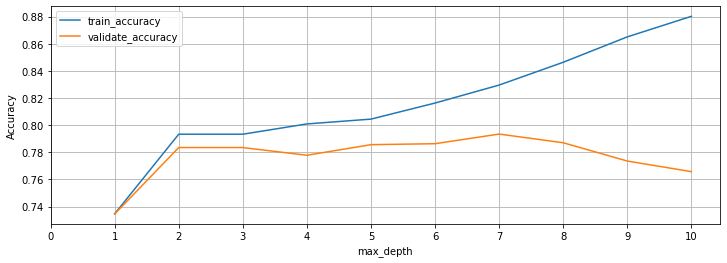

In [63]:
# Let's compare in-sample to out-of-sample for different max depths using a for loop
metrics = []

for i in range(1, 11):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)

# plot the data
df.set_index('max_depth', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,11,1))
plt.grid(b=True)

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best max depth value without crossing threshold for overfit is `7`
    - Accuracy for this model when evaluated on train is: `0.830`
    - Accuracy for this model when evaluated on validate is: `0.794`

---

### Random Forest

**Compare max depths using for loop**
- After experimenting with max depth, min samples per leaf, n estimators, it was discovered that highest accuracy with least amount of overfitting was achieved when only modifying max depth

,train_accuracy,validate_accuracy,difference
max_depth,,,
1,0.734675,0.734564,0.000
2,0.757160,0.751597,0.006
3,0.783905,0.787793,-0.004
4,0.800710,0.792051,0.009
5,0.808757,0.790632,0.018
6,0.817988,0.789212,0.029
7,0.834083,0.794180,0.040
8,0.845207,0.790632,0.055
9,0.860118,0.792051,0.068


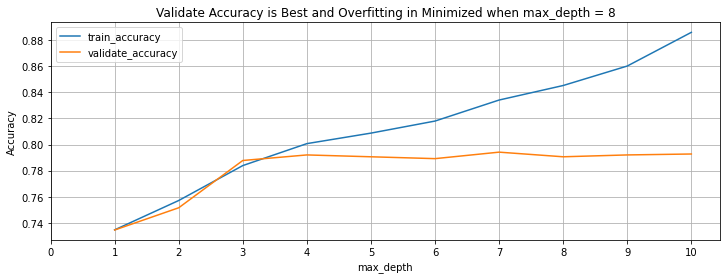

In [64]:
metrics = []

for i in range(1, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)

# plot the data
df.set_index('max_depth', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,11,1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized when max_depth = 8')

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best max depth value without crossing threshold for overfit is `8` -> `7`
    - Accuracy for this model when evaluated on train is: `0.843`
    - Accuracy for this model when evaluated on validate is: `0.794`

---

### KNN

**Compare k values using for loop**

,train_accuracy,validate_accuracy,difference
k,,,
1,0.998580,0.727466,0.271
2,0.876686,0.761533,0.115
3,0.866982,0.748048,0.119
4,0.846627,0.766501,0.080
5,0.841183,0.765791,0.075
6,0.833136,0.777857,0.055
7,0.829586,0.776437,0.053
8,0.830533,0.792761,0.038
9,0.826746,0.787083,0.040


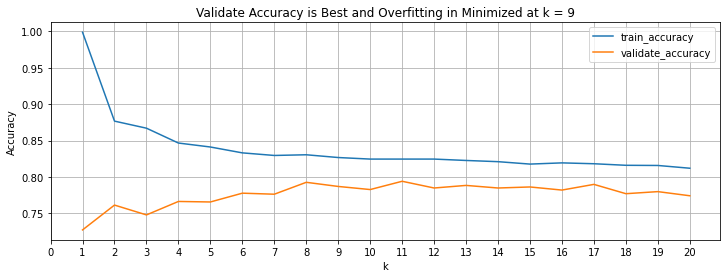

In [65]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remember only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
df = pd.DataFrame(metrics)

# plot the data
df.set_index('k', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized at k = 9')

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best k value without crossing threshold for overfit is `9` -> `11`
    - Accuracy for this model when evaluated on train is: `0.815`
    - Accuracy for this model when evaluated on validate is: `0.801`

---

### Logistic Regression

**Compare C values using for loop**

,train_accuracy,validate_accuracy,difference
C,,,
0.1,0.804260,0.794890,0.009
0.2,0.804024,0.797019,0.007
0.3,0.805917,0.797729,0.008
0.4,0.805680,0.799148,0.007
0.5,0.805680,0.799148,0.007
0.6,0.805444,0.799148,0.006
0.7,0.806391,0.799148,0.007
0.8,0.806154,0.799148,0.007
0.9,0.806391,0.799148,0.007


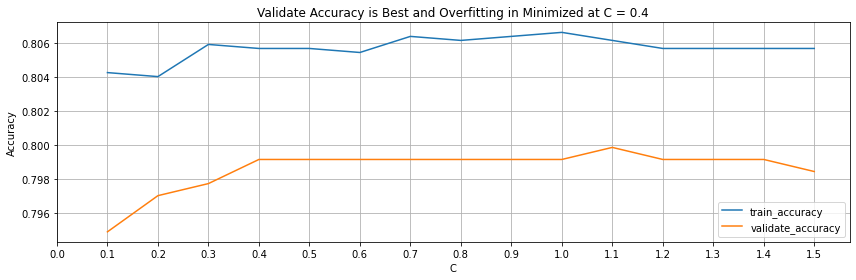

In [66]:
metrics = []

# loop through different values of C
for c in np.arange(0.1, 1.6, 0.1):
            
    # define the thing
    logit = LogisticRegression(C=c, random_state=123)
    
    # fit the thing (remember only fit on training data)
    logit.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = logit.score(X_train, y_train)
    validate_accuracy = logit.score(X_validate, y_validate)
    
    output = {
        "C": c,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
df = pd.DataFrame(metrics)

# plot the data
df.set_index('C', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 1.6, 0.1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized at C = 0.4')
plt.tight_layout()

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best C value without crossing threshold for overfit is `0.4` -> `1.1`
    - Accuracy for this model when evaluated on train is: `0.802`
    - Accuracy for this model when evaluated on validate is: `0.798`

***This one may be better than others when tested on test***

#  MinMaxScaler

In [67]:
def dummy_split_scale_telco(df):
    '''
    This function takes in a df, creates dummies for all categorical columns,
    concats dummies onto original df, drops original columns that have been dummied,
    and splits the new df into 60/20/20 train/validate/test
    It then scales only numerical columns using RobustScaler
    '''
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    dummy_df = pd.get_dummies(df[cat_cols], drop_first = True)
    df_w_dummies = pd.concat([df, dummy_df], axis=1)
    df_w_dummies.drop(columns=cat_cols, inplace=True)
    train, test = train_test_split(df_w_dummies, test_size=.2, random_state=123, stratify=df_w_dummies.churn_Yes)
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.churn_Yes)
    quant_vars = df.select_dtypes(include = ['number']).columns.tolist()
    train_num = train[quant_vars]
    validate_num = validate[quant_vars]
    test_num = test[quant_vars]
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(train_num)
    train_num_scaled = scaler.transform(train_num)
    validate_num_scaled = scaler.transform(validate_num)
    test_num_scaled = scaler.transform(test_num)
    train_num_scaled = pd.DataFrame(data=train_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    validate_num_scaled = pd.DataFrame(data=validate_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    test_num_scaled = pd.DataFrame(data=test_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    train.reset_index(inplace=True)
    validate.reset_index(inplace=True)
    test.reset_index(inplace=True)
    train_scaled = pd.concat([train, train_num_scaled], axis=1)
    validate_scaled = pd.concat([validate, validate_num_scaled], axis=1)
    test_scaled = pd.concat([test, test_num_scaled], axis=1)
    train_scaled.set_index('index', inplace=True)
    validate_scaled.set_index('index', inplace=True)
    test_scaled.set_index('index', inplace=True)
    train_scaled.drop(columns=quant_vars, inplace=True)
    validate_scaled.drop(columns=quant_vars, inplace=True)
    test_scaled.drop(columns=quant_vars, inplace=True)
    return train_scaled, validate_scaled, test_scaled

In [68]:
# read raw data info a dataframe (df)
df = a.get_telco_data()

In [69]:
# let's use the prepare.py module to implement findings above and clean data
df = p.clean_telco(df)

In [70]:
train, validate, test = dummy_split_scale_telco(df)

In [71]:
train.head()

,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,...,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_scaled,monthly_charges_scaled,total_charges_scaled
index,,,,,,,,,,,,,,,,,,,,,
6169,0,0,1,0,1,1,1,0,1,0,...,1,0,0,1,0,1,0,1.000000,0.868159,0.868644
3290,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0.388889,0.314925,0.162381
3615,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.069444,0.066667,0.011560
6309,1,0,0,1,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0.541667,0.818905,0.448525
856,1,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0.625000,0.752736,0.483632


In [72]:
# let's try modeling using new scaled data

#### X and y

In [73]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_train = train.churn_Yes

X_validate = validate.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_test = test.churn_Yes

In [74]:
# check proportions of splits
print(f'Proportion of train: {X_train.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of validate: {X_validate.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of test: {X_test.shape[0]/df.shape[0]:.2f}')

Proportion of train: 0.60
Proportion of validate: 0.20
Proportion of test: 0.20


### Decision Tree

**Compare max depths using for loop**

,train_accuracy,validate_accuracy,difference
max_depth,,,
1,0.734675,0.734564,0.000
2,0.793373,0.783534,0.010
3,0.793373,0.783534,0.010
4,0.800947,0.777857,0.023
5,0.804497,0.785664,0.019
6,0.816331,0.786373,0.030
7,0.829586,0.793471,0.036
8,0.846391,0.787083,0.059
9,0.865089,0.773598,0.091


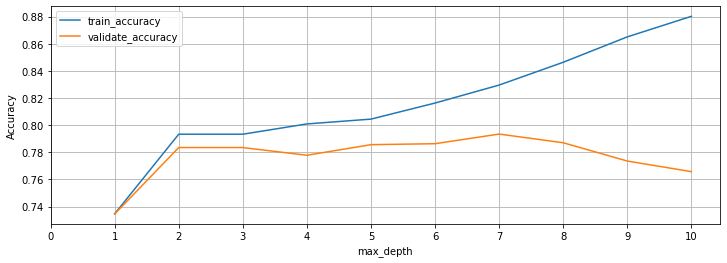

In [75]:
# Let's compare in-sample to out-of-sample for different max depths using a for loop
metrics = []

for i in range(1, 11):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)

# plot the data
df.set_index('max_depth', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,11,1))
plt.grid(b=True)

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best max depth value without crossing threshold for overfit is `7`
    - Accuracy for this model when evaluated on train is: `0.830`
    - Accuracy for this model when evaluated on validate is: `0.794`

---

### Random Forest

**Compare max depths using for loop**
- After experimenting with max depth, min samples per leaf, n estimators, it was discovered that highest accuracy with least amount of overfitting was achieved when only modifying max depth

,train_accuracy,validate_accuracy,difference
max_depth,,,
1,0.734675,0.734564,0.000
2,0.757160,0.751597,0.006
3,0.783905,0.787793,-0.004
4,0.800710,0.792051,0.009
5,0.808757,0.790632,0.018
6,0.817988,0.789212,0.029
7,0.834083,0.794180,0.040
8,0.845207,0.790632,0.055
9,0.860118,0.792051,0.068


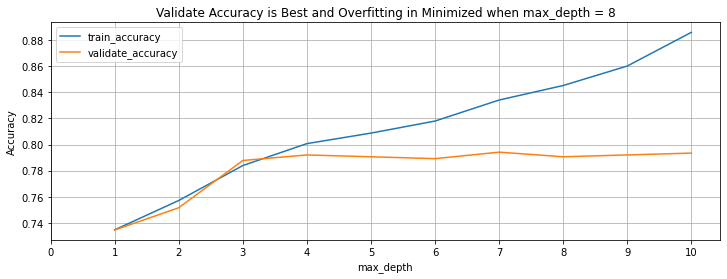

In [76]:
metrics = []

for i in range(1, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)

# plot the data
df.set_index('max_depth', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,11,1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized when max_depth = 8')

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best max depth value without crossing threshold for overfit is `8` -> `7`
    - Accuracy for this model when evaluated on train is: `0.843`
    - Accuracy for this model when evaluated on validate is: `0.794`

---

### KNN

**Compare k values using for loop**

,train_accuracy,validate_accuracy,difference
k,,,
1,0.998580,0.720369,0.278
2,0.870533,0.762243,0.108
3,0.864379,0.745209,0.119
4,0.847337,0.764372,0.083
5,0.840000,0.758694,0.081
6,0.830533,0.772179,0.058
7,0.830769,0.764372,0.066
8,0.827456,0.777857,0.050
9,0.823905,0.778566,0.045


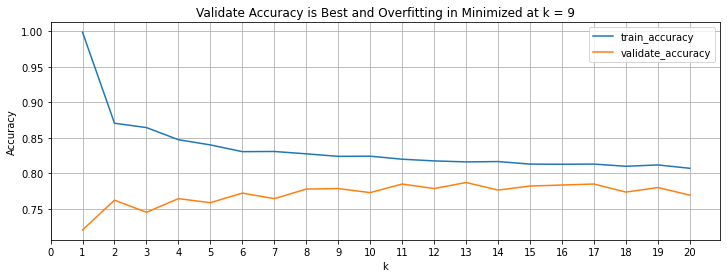

In [77]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remember only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
df = pd.DataFrame(metrics)

# plot the data
df.set_index('k', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized at k = 9')

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best k value without crossing threshold for overfit is `9` -> `11`
    - Accuracy for this model when evaluated on train is: `0.815`
    - Accuracy for this model when evaluated on validate is: `0.801`

---

### Logistic Regression

**Compare C values using for loop**

,train_accuracy,validate_accuracy,difference
C,,,
0.1,0.801893,0.795600,0.006
0.2,0.801657,0.794890,0.007
0.3,0.801657,0.793471,0.008
0.4,0.801657,0.792761,0.009
0.5,0.802130,0.793471,0.009
0.6,0.802367,0.794180,0.008
0.7,0.803077,0.797019,0.006
0.8,0.803787,0.797729,0.006
0.9,0.803550,0.797729,0.006


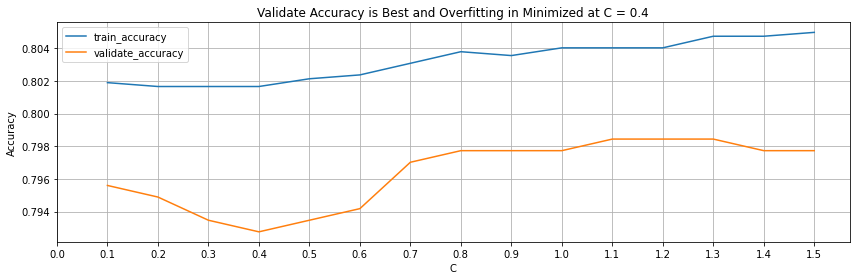

In [78]:
metrics = []

# loop through different values of C
for c in np.arange(0.1, 1.6, 0.1):
            
    # define the thing
    logit = LogisticRegression(C=c, random_state=123)
    
    # fit the thing (remember only fit on training data)
    logit.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = logit.score(X_train, y_train)
    validate_accuracy = logit.score(X_validate, y_validate)
    
    output = {
        "C": c,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
df = pd.DataFrame(metrics)

# plot the data
df.set_index('C', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 1.6, 0.1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized at C = 0.4')
plt.tight_layout()

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best C value without crossing threshold for overfit is `0.4` -> `1.1`
    - Accuracy for this model when evaluated on train is: `0.802`
    - Accuracy for this model when evaluated on validate is: `0.798`

***This one may be better than others when tested on test***

#  MaxAbsScaler

In [79]:
def dummy_split_scale_telco(df):
    '''
    This function takes in a df, creates dummies for all categorical columns,
    concats dummies onto original df, drops original columns that have been dummied,
    and splits the new df into 60/20/20 train/validate/test
    It then scales only numerical columns using RobustScaler
    '''
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    dummy_df = pd.get_dummies(df[cat_cols], drop_first = True)
    df_w_dummies = pd.concat([df, dummy_df], axis=1)
    df_w_dummies.drop(columns=cat_cols, inplace=True)
    train, test = train_test_split(df_w_dummies, test_size=.2, random_state=123, stratify=df_w_dummies.churn_Yes)
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.churn_Yes)
    quant_vars = df.select_dtypes(include = ['number']).columns.tolist()
    train_num = train[quant_vars]
    validate_num = validate[quant_vars]
    test_num = test[quant_vars]
    scaler = preprocessing.MaxAbsScaler()
    scaler.fit(train_num)
    train_num_scaled = scaler.transform(train_num)
    validate_num_scaled = scaler.transform(validate_num)
    test_num_scaled = scaler.transform(test_num)
    train_num_scaled = pd.DataFrame(data=train_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    validate_num_scaled = pd.DataFrame(data=validate_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    test_num_scaled = pd.DataFrame(data=test_num_scaled, columns=['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled'])
    train.reset_index(inplace=True)
    validate.reset_index(inplace=True)
    test.reset_index(inplace=True)
    train_scaled = pd.concat([train, train_num_scaled], axis=1)
    validate_scaled = pd.concat([validate, validate_num_scaled], axis=1)
    test_scaled = pd.concat([test, test_num_scaled], axis=1)
    train_scaled.set_index('index', inplace=True)
    validate_scaled.set_index('index', inplace=True)
    test_scaled.set_index('index', inplace=True)
    train_scaled.drop(columns=quant_vars, inplace=True)
    validate_scaled.drop(columns=quant_vars, inplace=True)
    test_scaled.drop(columns=quant_vars, inplace=True)
    return train_scaled, validate_scaled, test_scaled

In [80]:
# read raw data info a dataframe (df)
df = a.get_telco_data()

In [81]:
# let's use the prepare.py module to implement findings above and clean data
df = p.clean_telco(df)

In [82]:
train, validate, test = dummy_split_scale_telco(df)

In [83]:
train.head()

,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,...,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_scaled,monthly_charges_scaled,total_charges_scaled
index,,,,,,,,,,,,,,,,,,,,,
6169,0,0,1,0,1,1,1,0,1,0,...,1,0,0,1,0,1,0,1.000000,0.888421,0.868644
3290,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0.388889,0.420211,0.162381
3615,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.069444,0.210105,0.011560
6309,1,0,0,1,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0.541667,0.846737,0.448525
856,1,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0.625000,0.790737,0.483632


In [84]:
# let's try modeling using new scaled data

#### X and y

In [85]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_train = train.churn_Yes

X_validate = validate.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_test = test.churn_Yes

In [86]:
# check proportions of splits
print(f'Proportion of train: {X_train.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of validate: {X_validate.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of test: {X_test.shape[0]/df.shape[0]:.2f}')

Proportion of train: 0.60
Proportion of validate: 0.20
Proportion of test: 0.20


### Decision Tree

**Compare max depths using for loop**

,train_accuracy,validate_accuracy,difference
max_depth,,,
1,0.734675,0.734564,0.000
2,0.793373,0.783534,0.010
3,0.793373,0.783534,0.010
4,0.800947,0.777857,0.023
5,0.804497,0.785664,0.019
6,0.816331,0.786373,0.030
7,0.829586,0.793471,0.036
8,0.846391,0.787083,0.059
9,0.865089,0.773598,0.091


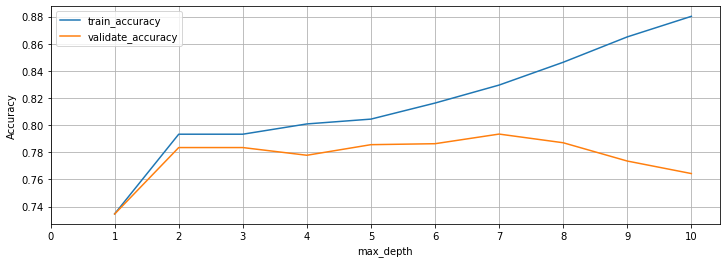

In [87]:
# Let's compare in-sample to out-of-sample for different max depths using a for loop
metrics = []

for i in range(1, 11):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)

# plot the data
df.set_index('max_depth', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,11,1))
plt.grid(b=True)

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best max depth value without crossing threshold for overfit is `7`
    - Accuracy for this model when evaluated on train is: `0.830`
    - Accuracy for this model when evaluated on validate is: `0.794`

---

### Random Forest

**Compare max depths using for loop**
- After experimenting with max depth, min samples per leaf, n estimators, it was discovered that highest accuracy with least amount of overfitting was achieved when only modifying max depth

,train_accuracy,validate_accuracy,difference
max_depth,,,
1,0.734675,0.734564,0.000
2,0.757160,0.751597,0.006
3,0.783905,0.787793,-0.004
4,0.800710,0.792051,0.009
5,0.808757,0.790632,0.018
6,0.817988,0.789212,0.029
7,0.834083,0.794180,0.040
8,0.845207,0.790632,0.055
9,0.860118,0.792051,0.068


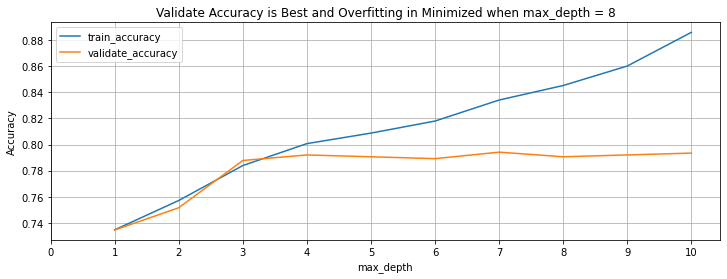

In [88]:
metrics = []

for i in range(1, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)

# plot the data
df.set_index('max_depth', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,11,1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized when max_depth = 8')

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best max depth value without crossing threshold for overfit is `8` -> `7`
    - Accuracy for this model when evaluated on train is: `0.843`
    - Accuracy for this model when evaluated on validate is: `0.794`

---

### KNN

**Compare k values using for loop**

,train_accuracy,validate_accuracy,difference
k,,,
1,0.998580,0.721789,0.277
2,0.871006,0.761533,0.109
3,0.866036,0.746629,0.119
4,0.846864,0.765082,0.082
5,0.840710,0.759404,0.081
6,0.828639,0.772889,0.056
7,0.830769,0.765082,0.066
8,0.827219,0.779986,0.047
9,0.822722,0.779986,0.043


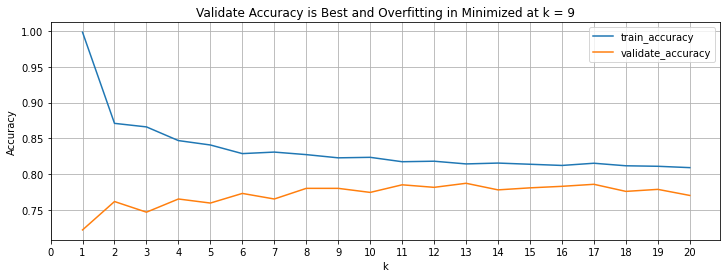

In [89]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remember only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
df = pd.DataFrame(metrics)

# plot the data
df.set_index('k', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized at k = 9')

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best k value without crossing threshold for overfit is `9` -> `11`
    - Accuracy for this model when evaluated on train is: `0.815`
    - Accuracy for this model when evaluated on validate is: `0.801`

---

### Logistic Regression

**Compare C values using for loop**

,train_accuracy,validate_accuracy,difference
C,,,
0.1,0.801657,0.795600,0.006
0.2,0.801657,0.794180,0.007
0.3,0.801183,0.792761,0.008
0.4,0.801183,0.792051,0.009
0.5,0.802130,0.792761,0.009
0.6,0.802604,0.794180,0.008
0.7,0.802604,0.794180,0.008
0.8,0.803077,0.795600,0.007
0.9,0.804024,0.797729,0.006


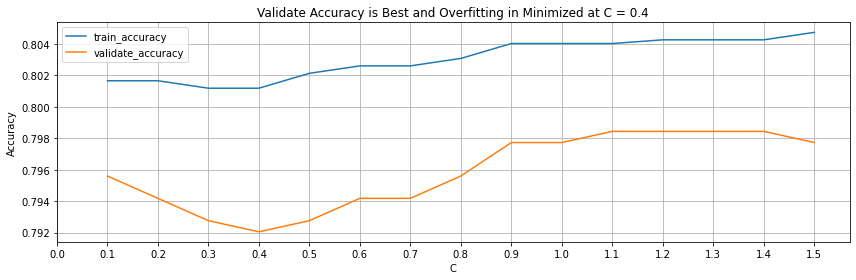

In [90]:
metrics = []

# loop through different values of C
for c in np.arange(0.1, 1.6, 0.1):
            
    # define the thing
    logit = LogisticRegression(C=c, random_state=123)
    
    # fit the thing (remember only fit on training data)
    logit.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = logit.score(X_train, y_train)
    validate_accuracy = logit.score(X_validate, y_validate)
    
    output = {
        "C": c,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
df = pd.DataFrame(metrics)

# plot the data
df.set_index('C', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 1.6, 0.1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized at C = 0.4')
plt.tight_layout()

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best C value without crossing threshold for overfit is `0.4` -> `1.1`
    - Accuracy for this model when evaluated on train is: `0.802`
    - Accuracy for this model when evaluated on validate is: `0.798`

***This one may be better than others when tested on test***

# tuning hyper-parameters

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
# read raw data info a dataframe (df)
df = a.get_telco_data()

In [93]:
# let's use the prepare.py module to implement findings above and clean data
df = p.clean_telco(df)

In [94]:
# split data and encode to prep data for modeling using function from prepare.py
train_encoded, validate_encoded, test_encoded = p.dummy_and_split_telco(df)

#### X and y

In [95]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train_encoded.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_train = train_encoded.churn_Yes

X_validate = validate_encoded.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_validate = validate_encoded.churn_Yes

X_test = test_encoded.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_test = test_encoded.churn_Yes

In [96]:
# check proportions of splits
print(f'Proportion of train: {X_train.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of validate: {X_validate.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of test: {X_test.shape[0]/df.shape[0]:.2f}')

Proportion of train: 0.60
Proportion of validate: 0.20
Proportion of test: 0.20


,train_accuracy,validate_accuracy,difference
max_depth,,,
1,0.734675,0.734564,0.000
2,0.793373,0.783534,0.010
3,0.793373,0.783534,0.010
4,0.800947,0.777857,0.023
5,0.804497,0.784954,0.020
6,0.816331,0.787083,0.029
7,0.829822,0.794180,0.036
8,0.846627,0.787793,0.059
9,0.866509,0.775727,0.091


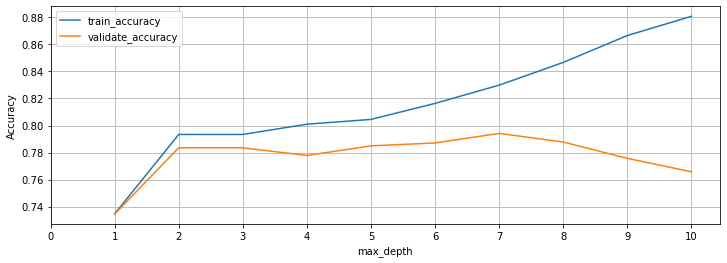

In [97]:
# Let's compare in-sample to out-of-sample for different max depths using a for loop
metrics = []

for i in range(1, 11):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)

# plot the data
df.set_index('max_depth', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,11,1))
plt.grid(b=True)

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

## DT

In [98]:
# create the model
tree = DecisionTreeClassifier(random_state=123)

In [99]:
# fit the model
tree = tree.fit(X_train, y_train)

In [100]:
param_grid = [
    {
        #'criterion' : ["gini", "entropy"],
        #'splitter' : ["best", "random"],
        'max_depth' : range(1,20),
        #'min_samples_split' : range(1,10),
        #'min_samples_leaf' : range(1,10)
    }
]

In [101]:
grid = GridSearchCV(estimator=tree, param_grid=param_grid, refit=True)

In [102]:
tree.score(X_train, y_train)

0.9985798816568048

In [103]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=123),
             param_grid=[{'max_depth': range(1, 20)}])

In [104]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005402,0.000891,0.002063,0.000300,1,{'max_depth': 1},0.734911,0.734911,0.734911,0.734911,0.733728,0.734675,0.000473,16
1,0.006938,0.001585,0.002336,0.000255,2,{'max_depth': 2},0.786982,0.805917,0.777515,0.772781,0.809467,0.790533,0.014781,3
2,0.009743,0.002177,0.003398,0.002500,3,{'max_depth': 3},0.786982,0.805917,0.777515,0.772781,0.809467,0.790533,0.014781,3
3,0.009601,0.001252,0.002015,0.000146,4,{'max_depth': 4},0.802367,0.792899,0.778698,0.783432,0.791716,0.789822,0.008185,5
4,0.008476,0.000411,0.001829,0.000232,5,{'max_depth': 5},0.794083,0.790533,0.784615,0.782249,0.810651,0.792426,0.010031,1
5,0.009219,0.000271,0.001838,0.000113,6,{'max_depth': 6},0.802367,0.796450,0.772781,0.784615,0.797633,0.790769,0.010727,2
6,0.009828,0.000187,0.001694,0.000087,7,{'max_depth': 7},0.802367,0.783432,0.782249,0.783432,0.783432,0.786982,0.007706,6
7,0.010521,0.000213,0.001795,0.000083,8,{'max_depth': 8},0.790533,0.777515,0.762130,0.791716,0.783432,0.781065,0.010769,7
8,0.011594,0.000463,0.002043,0.000389,9,{'max_depth': 9},0.776331,0.788166,0.762130,0.784615,0.791716,0.780592,0.010548,8
9,0.014112,0.000589,0.002024,0.000142,10,{'max_depth': 10},0.770414,0.789349,0.752663,0.779882,0.778698,0.774201,0.012330,9


In [105]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=123)

In [106]:
grid.best_params_

{'max_depth': 5}

In [107]:
grid.best_score_

0.7924260355029585

In [108]:
tree.score(X_validate, y_validate)

0.7374024130589071

## RF

In [171]:
# create the model
forest = RandomForestClassifier(random_state=123)

In [172]:
# Fit the model (on train and only train)
forest = forest.fit(X_train, y_train)

In [173]:
forest.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [177]:
param_grid = [
    {
        'max_depth' : range(1,10),
        #'min_samples_split' : range(1,10),
        'min_samples_leaf' : range(1,10)
    }
]

In [178]:
grid = GridSearchCV(estimator=forest, param_grid=param_grid, refit=True)

In [179]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=123),
             param_grid=[{'max_depth': range(1, 10),
                          'min_samples_leaf': range(1, 10)}])

In [180]:
grid.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=8, random_state=123)

In [181]:
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 8}

In [182]:
grid.best_score_

0.8113609467455621

In [184]:
results = pd.DataFrame(grid.cv_results_)

In [188]:
results[results.rank_test_score == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
79,0.23883,0.003382,0.017956,0.000163,9,8,"{'max_depth': 9, 'min_samples_leaf': 8}",0.816568,0.815385,0.804734,0.802367,0.817751,0.811361,0.006465,1


In [189]:
forest.score(X_train, y_train)

0.9985798816568048

In [190]:
forest.score(X_validate, y_validate)

0.7877927608232789

In [191]:
for_opt = grid.best_estimator_

In [192]:
for_opt.score(X_train, y_train)

0.8362130177514793

In [193]:
for_opt.score(X_validate, y_validate)

0.7970191625266146